<a class="anchor" id="0.1"></a>
# **Table of Contents** 

1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Conclusion](#7)
8. [References](8)

# **Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

Time series modeling is a widely used technique in the field of financial forecasting, and is especially relevant in the case of forecasting the price of Bitcoin on the stock market. Bitcoin is a cryptocurrency that has experienced significant price volatility over time, making it an ideal candidate for applying time series modeling techniques.

Bitcoin price time series modeling involves analyzing and predicting the patterns and trends seen in historical data. This can help investors, financial analysts, and other interested parties make informed decisions about buying, selling, or holding Bitcoin as an investment.

Time series models allow capturing both the deterministic and stochastic components present in the data. Some of the common characteristics considered when modeling the price of Bitcoin include the general trend, seasonal patterns, and the presence of shocks or unexpected events that can affect its value.

There are several approaches and techniques for modeling time series applied to Bitcoin price forecasting. Some of the most popular options include autoregressive integrated moving average (ARIMA) models, exponential smoothing models (such as Holt-Winters), regression models, and recurrent neural network (RNN)-based models, such as Long Short-Term (LSTM) models. Term Memory).

Importantly, forecasting the price of Bitcoin is challenging due to its highly volatile nature and the influence of external factors such as economic events, government regulations, and changes in market perception. However, time series modeling provides a solid foundation for understanding and predicting future Bitcoin price movements, which can be valuable to investors and traders in the stock market.

In summary, time series modeling applied to forecasting the price of Bitcoin on the stock market is a powerful tool to analyze and predict the movements of this digital asset. By using appropriate techniques and considering relevant factors, it is possible to obtain more accurate forecasts and make informed financial decisions.

# **Case study** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

In this case study, we will address time series modeling applied to Bitcoin price analysis and forecasting. The goal is to use time series modeling techniques to understand patterns and trends in the price of Bitcoin and develop a model that can predict future prices based on historical data.

We will use different techniques for analysis and forecasting:

1. Data collection.
2. Exploratory data analysis.
3. Data preparation.
4. Model selection.
5. Model adjustment and evaluation.
6. Bitcoin price forecast.

Time series modeling applied to Bitcoin price forecasting can be a useful tool for investors and analysts who wish to understand patterns and trends in the cryptocurrency market. By using time series modeling techniques, it is possible to capture seasonal characteristics and long-term trends in the price of Bitcoin and make forecasts that can help in making investment decisions. However, it is important to note that the cryptocurrency market is highly volatile and subject to a number of external factors, so future predictions may be subject to significant uncertainties.

## **Load Library**

In [2]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# Time
# ==============================================================================
import time
from datetime import datetime

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5

## **Load data**

Information about our data:

* Date: registration date.

* Open: opening price, the price at which an asset, in this case Bitcoin, is quoted at the beginning of the day. Expressed in US dollars (USD).

* High: maximum price of the day, highest price reached by Bitcoin on that day, (USD).

* Low: minimum price of the day, lowest price reached by Bitcoin on that day, (USD).

* Close: closing price, price at which Bitcoin is trading at the end of the day, (USD).

* Volume: volume, sum of real operations carried out during the day, (USD).

Note: The cryptocurrency market is a non-stop market, it operates 24 hours a day, 7 days a week. In any case, it is not strictly necessary that the close price coincides with the open price of the following day due to the fluctuations that the value of Bitcoin, or any cryptocurrency, may suffer during the last second of the day.

The data is extracted from the yahoo finance site.

In [4]:
ticker = 'BTC-USD'
period1 = int(time.mktime(datetime(2014, 1, 1).timetuple()))
period2 = int(time.mktime(datetime.now().timetuple()))
interval = '1d' # 1d, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

BTC = pd.read_csv(query_string, parse_dates=["Date"])
BTC.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [5]:
BTC["unique_id"]="1"
BTC=BTC.rename(columns={"Date": "ds", "Close": "y"})
BTC.head()

,ds,Open,High,Low,y,Adj Close,Volume,unique_id
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,1


In [5]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3317 entries, 0 to 3316
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         3317 non-null   datetime64[ns]
 1   Open       3317 non-null   float64       
 2   High       3317 non-null   float64       
 3   Low        3317 non-null   float64       
 4   y          3317 non-null   float64       
 5   Adj Close  3317 non-null   float64       
 6   Volume     3317 non-null   int64         
 7   unique_id  3317 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 207.4+ KB


# **Explore Data with the plot method** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

Graphical visualization of time series can be an effective strategy for detecting trends, patterns, and seasonality. This approach, in turn, makes it easier to identify potential lags that could be used as predictors in the model.

We will use the `plot` method of `Statsforecast` to visualize our data. This method prints 8 random series from the dataset and is useful for basic EDA.

This is what our data looks like, after having performed a couple of maneuvers on our data.

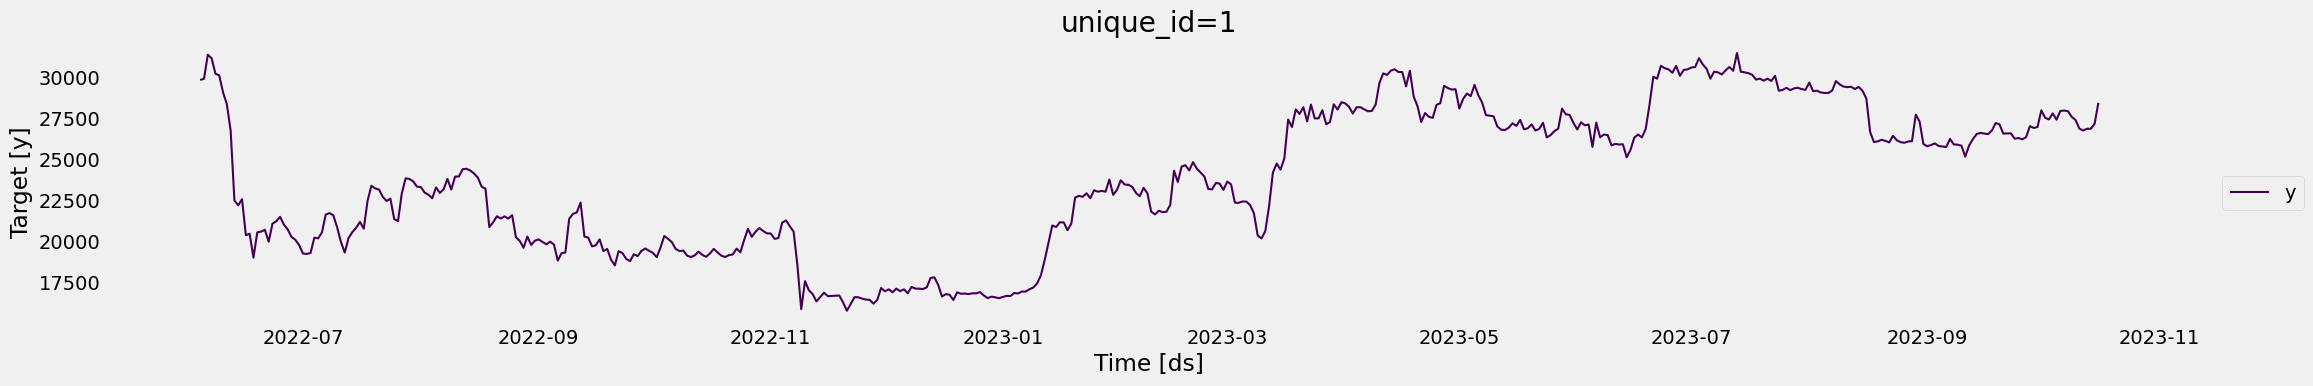

In [6]:
plot_series(BTC, max_insample_length=500)

## **Data distribution**
The distribution of the closing price of Bitcoin, variable close, is shown:

In [6]:
df=BTC.copy().set_index("ds")

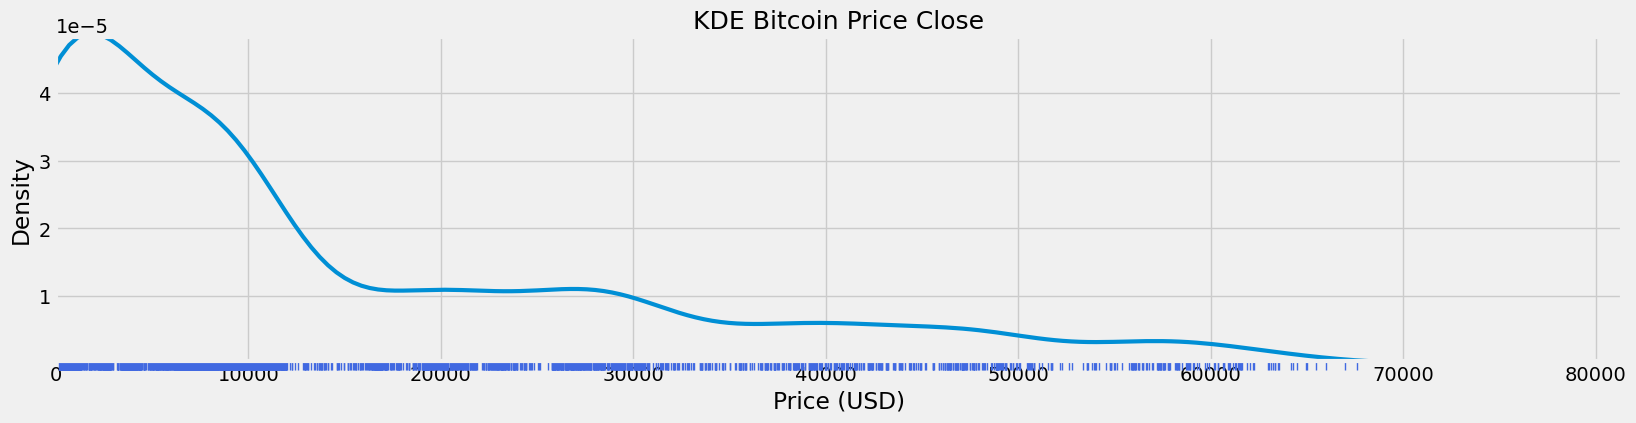

In [7]:
# Bitcoin Closing Price KDE Distribution
# ==============================================================================
fig, ax = plt.subplots(figsize=(18, 4))
p = sns.kdeplot(data=df, x='y', linewidth=3, ax=ax)
r = sns.rugplot(data=df, x='y', ax=ax, c='royalblue',
                height=-.03, clip_on=False)
p.set(xlim=(0, None))
p.set_title('KDE Bitcoin Price Close', fontsize=18)
p.set_xlabel('Price (USD)');

In the study data it can be seen that most prices are below 20,000 (USD). This trend continued from 2014 until September 2020. However, as of 2021, prices have increased significantly, standing in a range of 35,000 to 67,500 (USD).

Modeling a time series with such an asymmetric distribution and with different orders of magnitude over time can be difficult. One strategy to mitigate these problems is to focus on modeling changes (deltas) rather than direct values. A further simplification would be to only indicate whether the price has increased or decreased compared to the previous day.

### **Price per year**

In [9]:
# The corresponding data is located for each year
# ==============================================================================
years = list(df.index.year.unique())
df_plot = pd.DataFrame()

for year in years:
    
    year_open  = df.loc[df.index.year == year, 'Open'][0]
    year_close = df.loc[df.index.year == year, 'y'][-1]
    year_low   = df.loc[df.index.year == year, 'Low'].min()
    year_high  = df.loc[df.index.year == year, 'High'].max()
    
    df_plot[year] = pd.Series([year_open, year_close, year_low, year_high]) 
    
df_plot = df_plot.T
df_plot = df_plot.set_axis(['open', 'close', 'low', 'high'], axis=1)

# The % change between the open and the close of the year is calculated
# ==============================================================================
df_plot['year_change'] = 100*(df_plot['close'] - df_plot['open']) / df_plot['open']
df_plot.head(3)

,open,close,low,high,year_change
2014,465.864014,320.192993,289.295990,468.174011,-31.269001
2015,320.434998,430.566986,171.509995,495.562012,34.369525
2016,430.721008,963.742981,354.914001,979.396973,123.751097


In [10]:
# A list of dicts is created with the % change annotations for the chart
# ==============================================================================
annotations_list = []
max_high = df_plot['high'].max()

for year in years:
    
    df_aux = df_plot.loc[df_plot.index == year,]
    loc_x  = pd.to_datetime(df_aux.index[0], format='%Y')
    loc_y  = df_aux['high'].values[0]/max_high + 0.05
    text   = '{:.1f}%'.format(df_aux['year_change'].values[0])
    
    annotation = dict(x=loc_x, y=loc_y, 
                      xref='x', yref='paper',
                      showarrow=False, xanchor='center', 
                      text=text)

    annotations_list.append(annotation)

# Interactive Yearly Candlestick Chart with Plotly
# ==============================================================================
candlestick = go.Candlestick(
                  x     = pd.to_datetime(df_plot.index, format='%Y'),
                  open  = df_plot.open,
                  close = df_plot.close,
                  low   = df_plot.low,
                  high  = df_plot.high
              )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width       = 800,
    height      = 350,
    title       = dict(text='Chart Bitcoin/USD per year', font=dict(size=25)),
    yaxis_title = dict(text='Price (USD)', font=dict(size=13)),
    margin      = dict(l=0, r=20, t=55, b=20),
    xaxis_rangeslider_visible = False,
    annotations = annotations_list
)

fig.show()

In [11]:
df1=BTC.copy().reset_index()

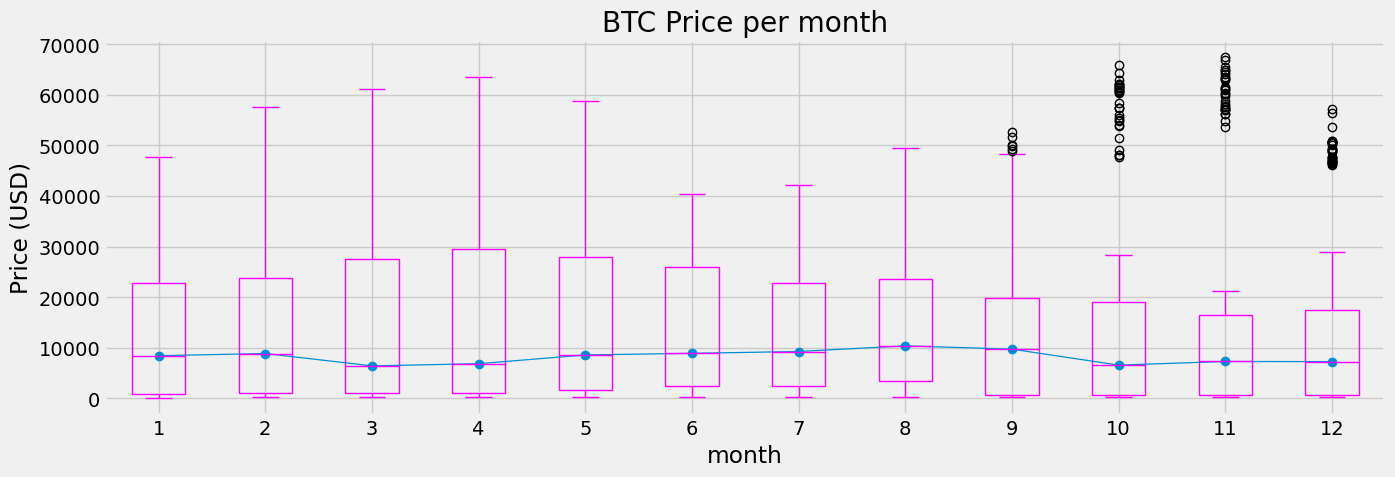

In [12]:
# Boxplot graph for monthly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 5))
df1['month'] = df1['ds'].apply(lambda x: x.month)
df1.boxplot(column="y", by='month', ax=ax, color="fuchsia")
df1.groupby('month')["y"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('Price (USD)')
ax.set_title('BTC Price per month')
fig.suptitle('');

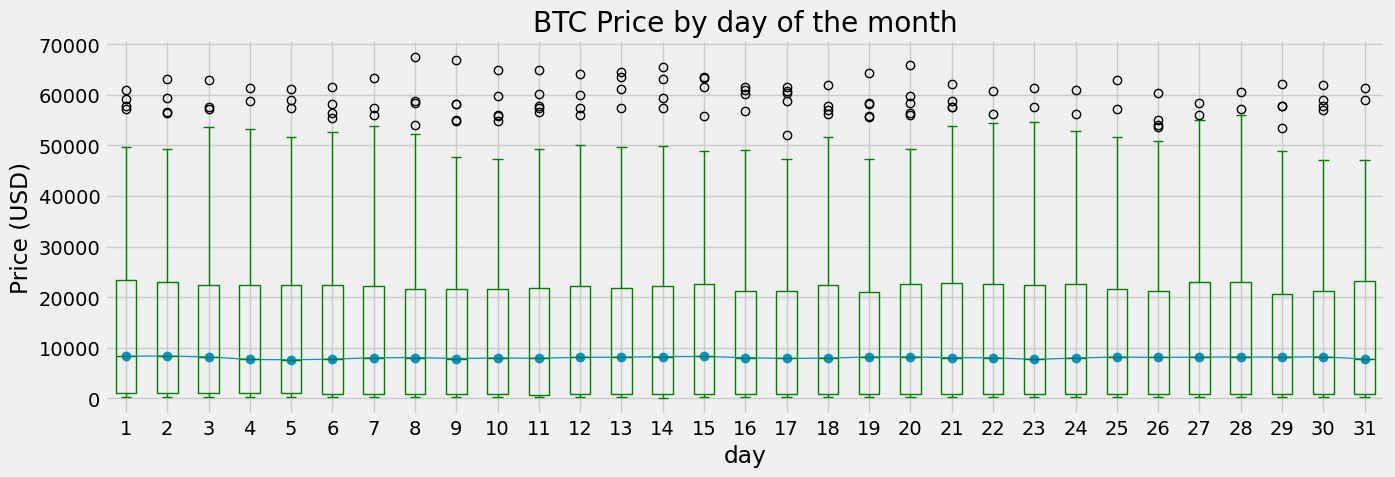

In [13]:
# Boxplot graph for monthly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 5))
df1['day'] = df1['ds'].apply(lambda x: x.day)
df1.boxplot(column="y", by='day', ax=ax, color="green")
df1.groupby('day')["y"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('Price (USD)')
ax.set_title('BTC Price by day of the month')
fig.suptitle('');

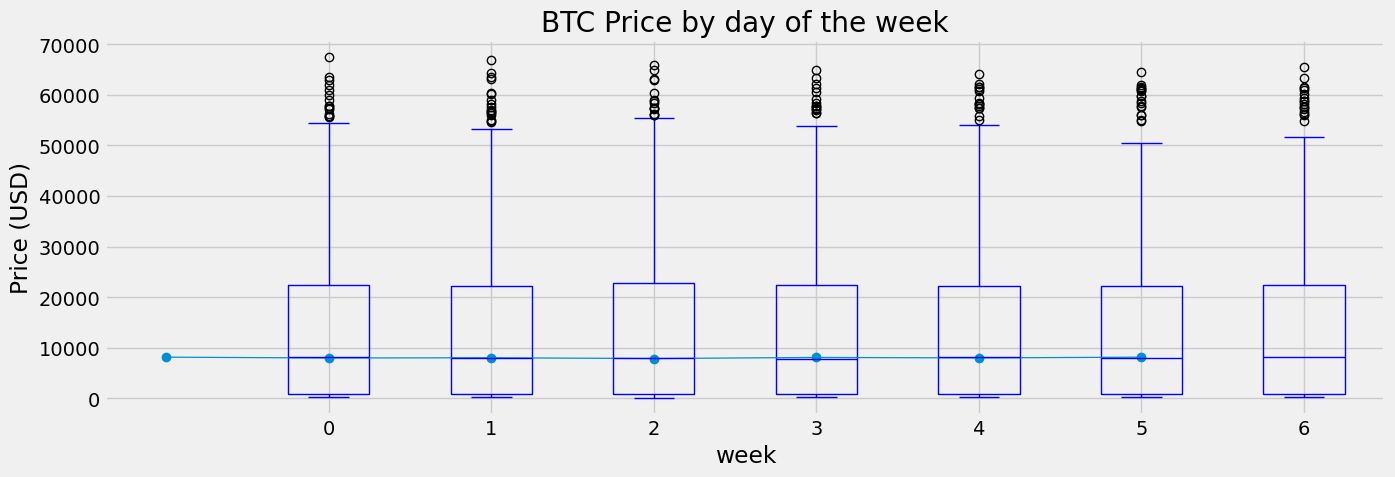

In [14]:
# Boxplot graph for monthly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 5))
df1['week'] = df1['ds'].apply(lambda x: x.day_of_week)
df1.boxplot(column="y", by='week', ax=ax, color="blue")
df1.groupby('week')["y"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('Price (USD)')
ax.set_title("BTC Price by day of the week")
fig.suptitle('');

In general, a time series that follows an autoregressive pattern shows a repetitive trend over time, which may include seasonality, cyclical factors, and other elements. In the case of Bitcoin, a certain annual seasonality can be observed at the end and beginning of the year, with more pronounced price fluctuations. However, no form of seasonality is detected in the monthly and weekly intervals, since they show very similar distributions.

## **Autocorrelation Plot**

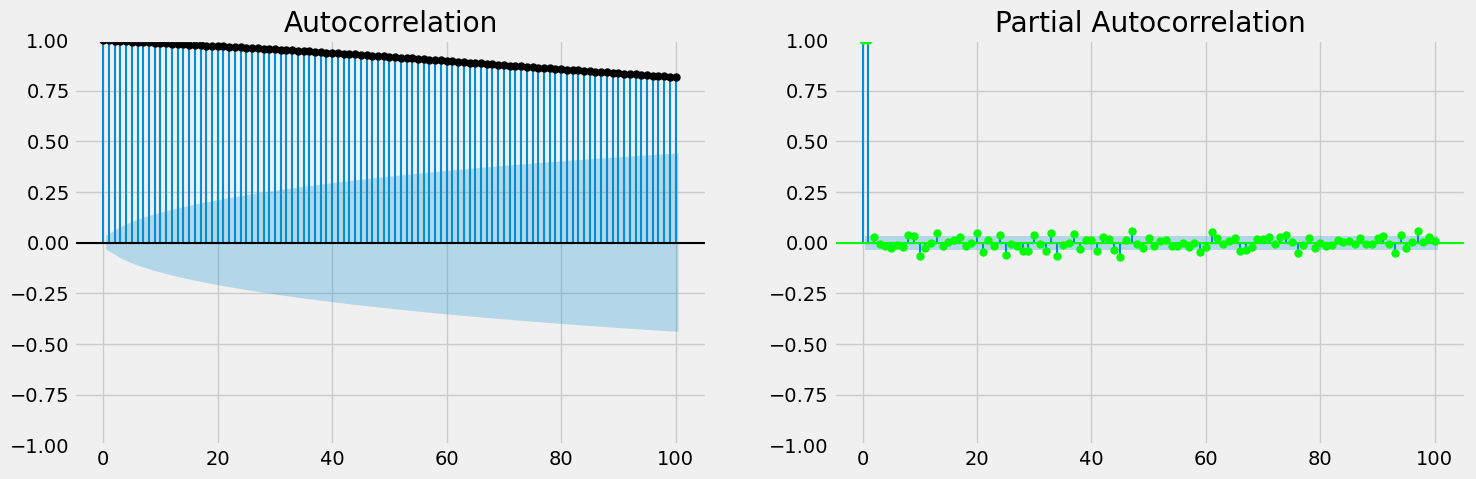

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plot_acf(BTC["y"],  lags=100, ax=axs[0],color="black")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(BTC["y"],  lags=100, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')
plt.show()

The partial autocorrelation plots show that only lag 1 is correlated with lag 0. Subsequent lags do not reach the significance threshold.

# **Split the data into training and testing** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 30 days.

In [ ]:
#btc=BTC[["ds","y","unique_id"]]

In [20]:
btc=BTC.drop("y", axis=1)
train = BTC[BTC.ds<='2023-09-16'] 
test=btc[(btc['ds'] > '2023-09-16')]

train.shape, test.shape

((3287, 8), (30, 7))

# **Implementation with StatsForecast** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

We are going to train the `Multiple Seasonal Trend (MSTL)` model, using the `MSTL` function. This model will help us forecast user demand in the next 30 days.

In [34]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, SeasonalNaive, MSTL, AutoTheta

In [35]:
season_length = 7 # Daily data 
horizon = len(test) # number of predictions

models = [MSTL(
    season_length=[7,365], # seasonalities of the time series 
    trend_forecaster=AutoTheta() # model used to forecast trend
)]

In [36]:
# Instantiate StatsForecast class as sf
sf_exo = StatsForecast(
    models=models,
    freq='D', 
    fallback_model = SeasonalNaive(season_length=7),
    n_jobs=-1)
sf_exo

StatsForecast(models=[MSTL])

## **Fit the Model**

In [37]:
sf_exo.fit(train,test)

StatsForecast(models=[MSTL])

## **Predict Method**

The predict method takes only 2 parameters

* The Horizon: amount of data you want to predict
* Exogenous variables without the target variable

In [38]:
Y_hat=sf_exo.predict(h=horizon,X_df=test) 
Y_hat

,ds,MSTL
unique_id,,
1,2023-09-17,26247.353516
1,2023-09-18,26207.865234
1,2023-09-19,26022.935547
1,2023-09-20,26190.017578
1,2023-09-21,25110.505859
1,2023-09-22,24254.050781
1,2023-09-23,24962.593750
1,2023-09-24,24717.027344
1,2023-09-25,23938.757812


In [46]:
actual_exo=BTC[BTC.ds>'2023-09-16'] 

## **Plot forecasting**

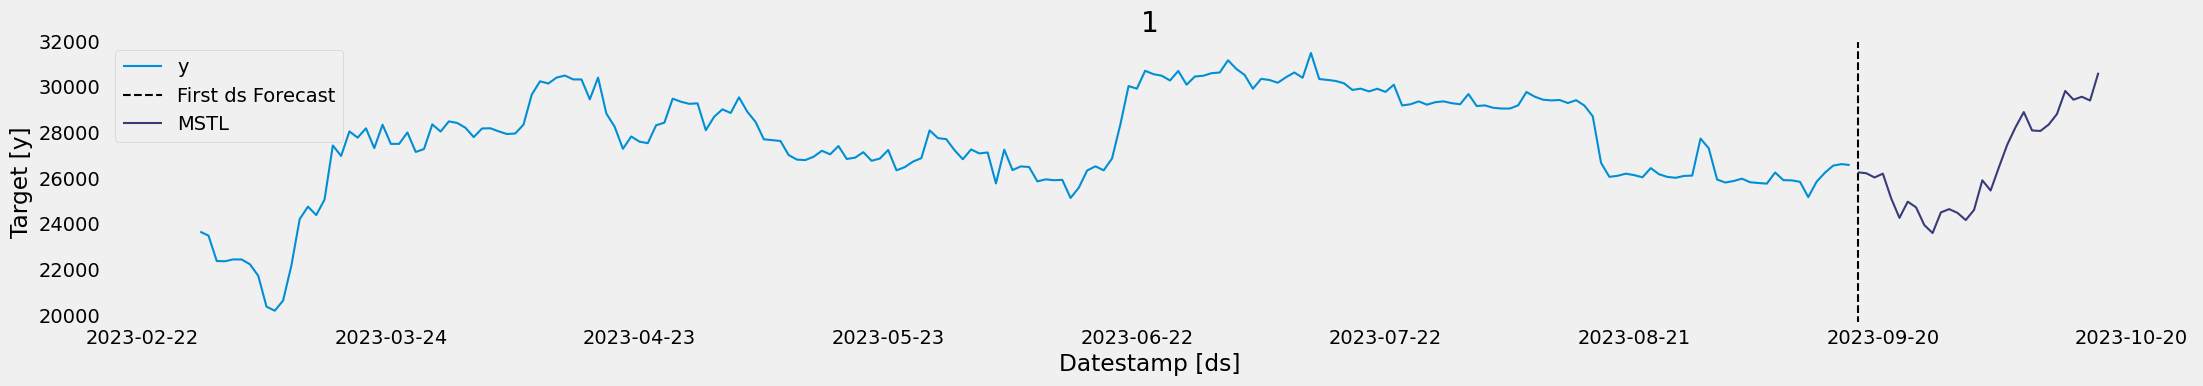

In [39]:
sf_exo.plot(train, Y_hat, max_insample_length=200)

# **Evaluate the model** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

We are going to evaluate the performance of our MSTL model for the predicted data of the Bitcoin price, for this we are going to build a function where we can have different types of metrics

In [40]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [41]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [49]:
evaluate_performace(train, actual_exo,Y_hat.reset_index() , models=["MSTL"])

,mae,mape,mase,rmse,smape
MSTL,1671.863932,6.188814,0.815091,1907.249617,6.273976


# **Conclusion** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

Based on the results provided for the Bitcoin price forecast, the following can be concluded:

In [52]:
print(evaluate_performace(train, actual_exo,Y_hat.reset_index() , models=["MSTL"]))

              mae      mape      mase         rmse     smape
MSTL  1671.863932  6.188814  0.815091  1907.249617  6.273976


Overall, although the MSTL model has shown a certain degree of accuracy in forecasting the price of Bitcoin, it is important to note that these results must be evaluated in comparison to other available models and considering the inherent volatility of the cryptocurrency market. Furthermore, it is advisable to use additional metrics and perform in-depth analysis to obtain a more complete evaluation of the performance of the MSTL model in forecasting the Bitcoin price.

We can consider other aspects to improve the model:

- As shown in this tutorial, the incorporation of exogenous variables as predictors can greatly improve the predictive capacity.
- Train different models that can improve the performance of the demand for shared bicycle rental.
- Add prediction interval.
- Develop a Cross Validations.
- Train Machine Learning and Deep Learning Models.

# **References** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

1. Changquan Huang • Alla Petukhina. Springer series (2022). Applied Time Series Analysis and Forecasting with Python. 
2. Ivan Svetunkov. [Forecasting and Analytics with the Augmented Dynamic Adaptive Model (ADAM)](https://openforecast.org/adam/)
3. [James D. Hamilton. Time Series Analysis Princeton University Press, Princeton, New Jersey, 1st Edition, 1994.](https://press.princeton.edu/books/hardcover/9780691042893/time-series-analysis)
4. [Nixtla Parameters](https://nixtla.github.io/statsforecast/src/core/models.html#multiple-seasonalities).
5. [Model MTSL](https://nixtla.github.io/statsforecast/docs/models/multipleseasonaltrend.html)
6. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
7. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
8. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).